## Chapter 09 -- Linear dynamical systems

Modified by kmp 2022

Sources:

https://web.stanford.edu/~boyd/vmls/

https://github.com/vbartle/VMLS-Companions

Based on "Boyd and Vandenberghe, 2021, Introduction to Applied Linear Algebra: Vectors, Matrices, and Least Squares - Julia Language Companion" https://web.stanford.edu/~boyd/vmls/vmls-julia-companion.pdf


In [14]:
using LinearAlgebra
using VMLS

### 9.1 Linear dynamical systems

Let us simulate a time-invariant linear dynamic system 
$$
x_{t+1} = Ax_t,   t = 1, . . . , T,
$$
with dynamics matrix
$$
A =
\begin{bmatrix}
0.97 &  0.10  & −0.05 \\
−0.3 &  0.99  & 0.05 \\
0.01 &  −0.04 &  0.96
\end{bmatrix}
$$

and initial state $x_1 = (1, 0,−1)$. We store the state trajectory in the $n×T$ matrix `state_traj`, with the $i$:th column $x_t$. We plot the result in Figure 9.1.

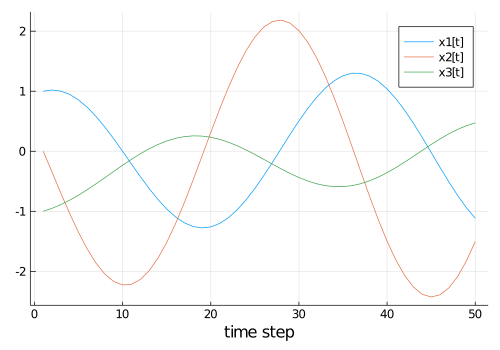

In [13]:
x1 = [1,0,-1] # initial state

n = length(x1) 
T = 50
A = [0.97 0.10 -0.05; -0.3 0.99 0.05; 0.01 -0.04 0.96]

state_traj = [x1 zeros(n, T-1)] # padding with (T-1) zero-columns

for t = 1:T-1 # Dynamics recursion
    state_traj[:, t+1] = A*state_traj[:, t]
end

using Plots

plot(1:T, state_traj', xlabel = "time step", label = ["x1[t]" "x2[t]" "x3[t]"], size = [500, 350])

**Figure 9.1** Linear dynamical system simulation.

### 9.2 Population dynamics
The following code predicts the 2020 population distribution in the US using the data of Section [9.2](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section.9.2) of VMLS, which are available through the VMLS function `population_data`. The result is shown in Figure 9.2.

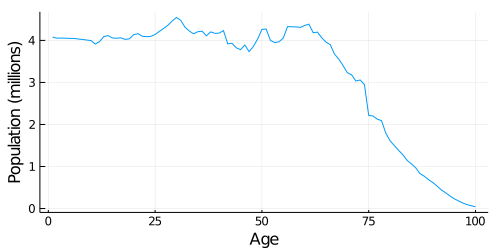

In [19]:
# Import 3 100-vectors: population, birth_rate, death_rate
D = population_data()
b = D["birth_rate"]
d = D["death_rate"]

A = [b'; diagonal(1 .- d[1:end-1]) zeros(length(d)-1)];
x = D["population"]

for k = 1:10
    global x
    x = A*x
end

using Plots
plot(x, legend=false, xlabel = "Age", ylabel = "Population (millions)", size = [500, 250])

**Figure 9.2** Predicted age distribution in the US in 2020.


Note the keyword **`global`** in the for-loop. Without this statement, the scope of the variable x created by the assignment `x = A*x` would be **local to the for-loop**, i.e., this variable does not exist outside the loop and is different from the `x` outside the loop.

**9.3 Epidemic dynamics**
To implement the simulation of the epidemic dynamics from VMLS §[9.3](https://web.stanford.edu/\\%7Eboyd/vmls/vmls.pdf#section.9.3) and plot figure 9.3:

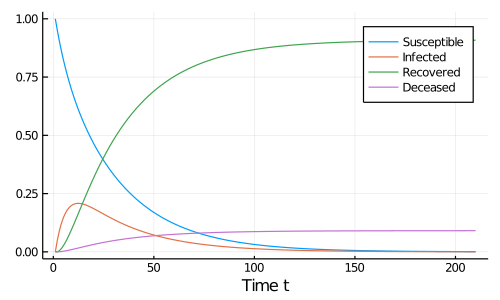

In [24]:
T = 210
A = [0.95 0.04 0 0; 0.05 0.85 0 0; 0 0.10 1 0; 0 0.01 0 1]

x1 = [1,0,0,0]
state_traj = [x1 zeros(4,T-1) ] # State trajectory

for t = 1:T-1 # Dynamics recursion
    state_traj[:, t+1] = A*state_traj[:, t];
end

using Plots
plot(1:T, state_traj', xlabel = "Time t", label = ["Susceptible" "Infected" "Recovered" "Deceased"], size = [500, 300])

**Figure 9.3** Simulation of epidemic dynamics.

**9.4 Motion of a mass**
To simulate the discretized model of the motion of a mass in §[9.4](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section.9.4) of VMLS, see figure 9.4:

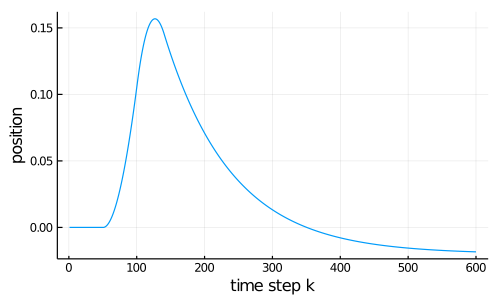

In [26]:
h = 0.01 # step-size
m = 1
eta = 1

A = [1 h; 0 1-h*eta/m]
B = [ 0; h/m]
x1 = [0,0]

K = 600 # simulate K*h = 6 seconds
f = zeros(K)
f[50:99] .= 1.0
f[100:139] .= -1.3

X = [x1 zeros(2, K-1)]
for k = 1:K-1
    X[:, k+1] = A*X[:, k] + B*f[k]
end

using Plots
plot(X[1,:], xlabel="time step k", ylabel="position", legend=false, size = [500, 300])

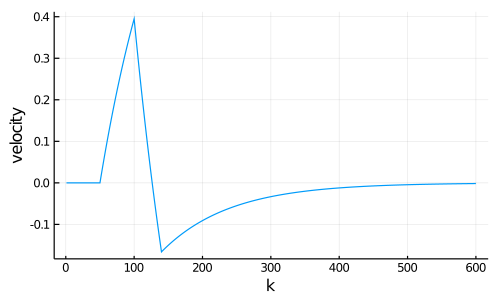

In [27]:
plot(X[2,:], xlabel="k", ylabel="velocity", legend=false, size = [500, 300])

**Figure 9.4** Simulation of a mass moving along a line: position (top) and
velocity (bottom).